1. Для каждого из рисунков методом k-средних разбить выборку треугольников и квадратов на два класса.
  

* 1-й рисунок: квадраты и треугольники образуют две непересекающиеся области, которые  визуально легко разделить прямой линией,




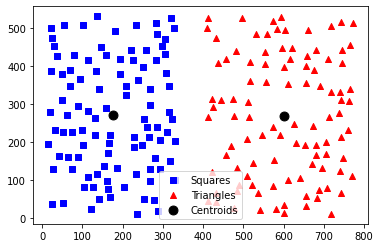

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения с квадратами и треугольниками
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник
line_color = (0, 0, 255)  # Синий цвет линии

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 350 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Преобразуем изображение в массив для алгоритма k-средних
data = np.array(squares + triangles, dtype=np.float32)

# Определим количество кластеров
k = 2

# Определим критерий останова
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Запуск алгоритма k-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение квадратов и треугольников по кластерам
squares_cluster1 = data[labels.ravel() == 0]
triangles_cluster1 = data[labels.ravel() == 1]

# Отображение результатов
plt.scatter(squares_cluster1[:,0], squares_cluster1[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_cluster1[:,0], triangles_cluster1[:,1], c='r', marker='^', label='Triangles')
plt.scatter(centers[:,0], centers[:,1], s=80, c='k', marker='o', label='Centroids')
plt.legend()
plt.show()

* 2-й рисунок: квадраты и треугольники образуют две непересекающиеся области, которые  разделяются прямой линией


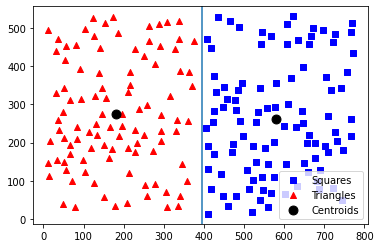

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения с квадратами и треугольниками
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник
line_color = (0, 0, 255)  # Синий цвет линии

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 400 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 1, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 400 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Рисуем прямую синей линию для разделения квадратов и треугольников
cv2.line(image, (395, 0), (395, 600), line_color, thickness=1)

# Преобразуем изображение в массив для алгоритма k-средних
data = np.array(squares + triangles, dtype=np.float32)

# Определим количество кластеров
k = 2

# Определим критерий останова
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Запуск алгоритма k-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение квадратов и треугольников по кластерам
squares_cluster1 = data[labels.ravel() == 0]
triangles_cluster1 = data[labels.ravel() == 1]

# Отображение результатов
plt.scatter(squares_cluster1[:,0], squares_cluster1[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_cluster1[:,0], triangles_cluster1[:,1], c='r', marker='^', label='Triangles')
plt.scatter(centers[:,0], centers[:,1], s=80, c='k', marker='o', label='Centroids')
plt.axvline(x=395)
plt.legend()
plt.show()



* 3-й рисунок: квадраты и треугольники образуют две пересекающиеся области, при этом в небольшом пересечении этих областей находится 6 фигур одного типа и 3 фигур другого типа. 

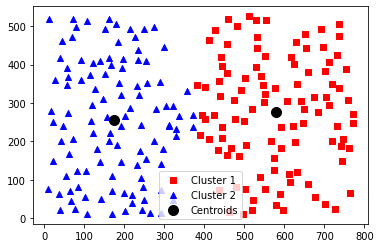

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения
image3 = create_image()

# Определение цветов для квадратов и треугольников
color_square3 = (0, 255, 0)  # Зеленый квадрат
color_triangle3 = (255, 255, 0)  # Желтый треугольник

# Создание списков для хранения координат квадратов и треугольников
squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 320 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(420 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle1, x_triangle, y_triangle, size)

# Добавление пересекающихся фигур
for i in range(4):
    x_square = np.random.randint(300, 400)  # Случайная координата X для квадрата
    y_square = np.random.randint(200, 350)  # Случайная координата Y для квадрата
     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(300, 400 - size - 3)
            y_square = np.random.randint(200, 350 - size - 3)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square3, x_square, y_square, size)
    
for i in range(7):
    x_triangle = np.random.randint(300, 400)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(200, 350)  # Случайная координата Y для треугольника
     # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(300, 400 - size - 2)
            y_triangle = np.random.randint(200, 350 - size - 2)

    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle3, x_triangle, y_triangle, size)

# Подготовка данных для алгоритма к-средних
data = np.float32(squares + triangles)

# Определение параметров к-средних
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2

# Запуск алгоритма к-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение точек на два кластера
cluster1 = data[labels.ravel()==0]
cluster2 = data[labels.ravel()==1]

# Визуализация результатов
plt.scatter(cluster1[:,0], cluster1[:,1], c='r', marker='s', label='Cluster 1')
plt.scatter(cluster2[:,0], cluster2[:,1], c='b', marker='^', label='Cluster 2')
plt.scatter(centers[:,0], centers[:,1], s=100, c='k', marker='o', label='Centroids')
plt.legend()
plt.show()

2. На каждой картинке разместить 9 кругов: по 3 круга в первой области, во второй области, в пересечении областей или близко к линии разделения областей. 
Провести классификацию кругов методом k ближайших соседей.

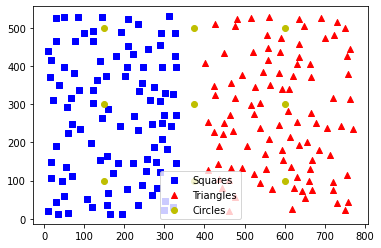

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 1, Neighbours - [1. 1. 0.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 1, Neighbours - [0. 1. 1.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 0, Neighbours - [0. 1. 0.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Создание изображения с квадратами, треугольниками и кругами
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 350 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Набор объектов, содержащий значения (x,y) квадратов, треугольников и кругов.
trainData = np.array(squares + triangles, dtype=np.float32)

# Маркируем квадратом или треугольником цифрами 0, 1.
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


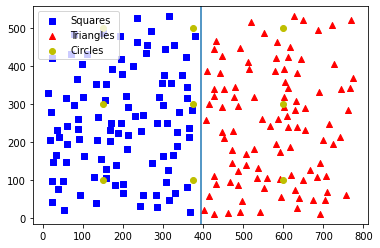

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 0, Neighbours - [0. 1. 0.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 0, Neighbours - [0. 0. 1.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 0, Neighbours - [0. 0. 0.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Создание изображения с квадратами, треугольниками и кругами
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 400 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(399 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 400 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(399, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Feature set containing (x,y) values of squares, triangles, and circles
trainData = np.array(squares + triangles, dtype=np.float32)

# Labels each one either Square or Triangle or Circle with numbers 0, 1, and 2
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.axvline(x=395)
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


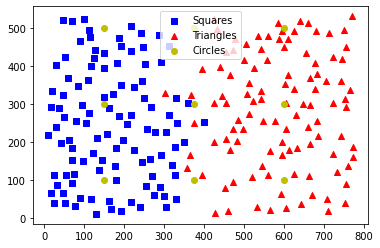

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 1, Neighbours - [1. 1. 0.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 0, Neighbours - [0. 1. 0.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 1, Neighbours - [1. 1. 0.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Создание изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3)) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Третье изображение
image = create_image()
color_square = (0, 255, 0)  # Зеленый квадрат
color_triangle = (255, 255, 0)  # Желтый треугольник


squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 320 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(420 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle, x_triangle, y_triangle, size)

# Добавление пересекающихся фигур
for i in range(4):
    x_square = np.random.randint(300, 400)  # Случайная координата X для квадрата
    y_square = np.random.randint(100, 350)  # Случайная координата Y для квадрата
     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(300, 400 - size - 3)
            y_square = np.random.randint(200, 350 - size - 3)

    squares.append((x_square, y_square))
    image = create_square(image, color_square, x_square, y_square, size)
for i in range(7):
    x_triangle = np.random.randint(300, 400)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(100, 400)  # Случайная координата Y для треугольника
     # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(300, 400 - size - 2)
            y_triangle = np.random.randint(200, 350 - size - 2)

    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle, x_triangle, y_triangle, size)

# Feature set containing (x,y) values of squares, triangles, and circles
trainData = np.array(squares + triangles, dtype=np.float32)

# Labels each one either Square or Triangle or Circle with numbers 0, 1, and 2
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")
